In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from pandas import DataFrame
from pandas import Series
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
apple = pd.read_csv("applemobility-USonly.csv")

In [3]:
mitig = pd.read_csv("mitigation_cleaned.csv")

In [6]:
google = pd.read_csv("Global_Mobility_Report.csv")
google_us = google[google["country_region_code"] == "US"]

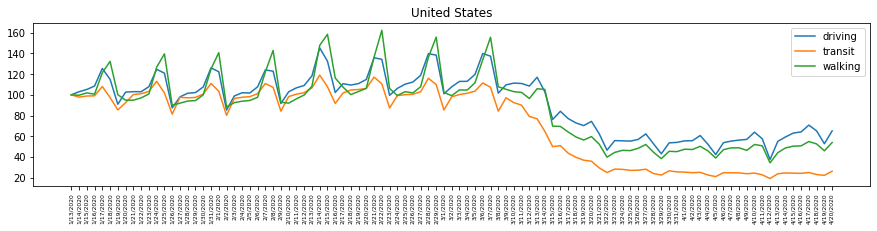

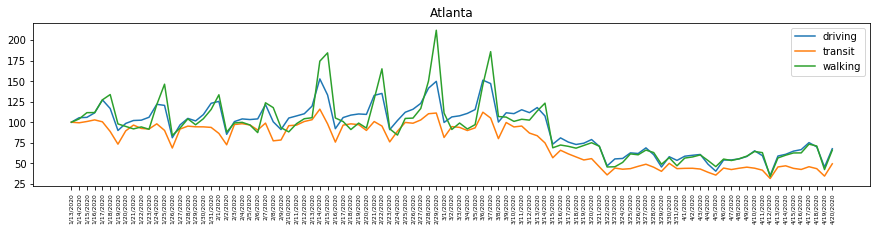

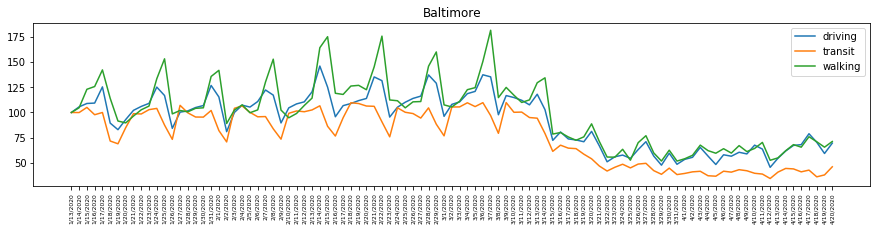

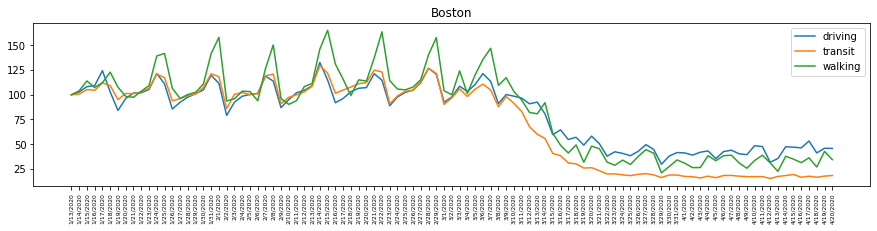

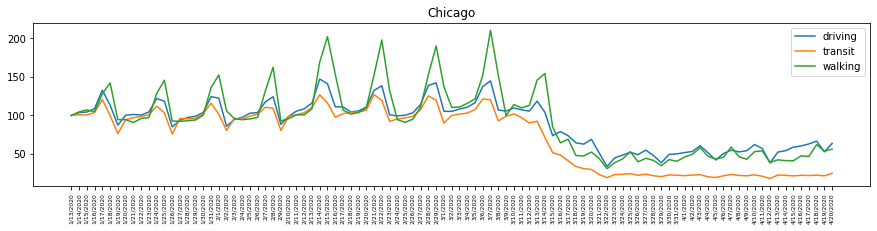

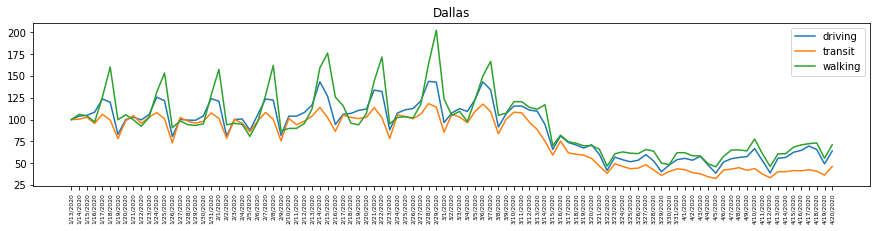

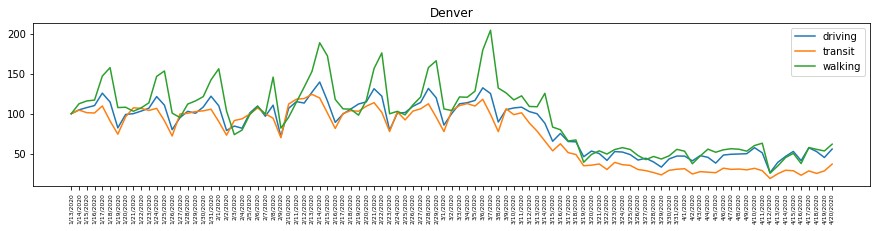

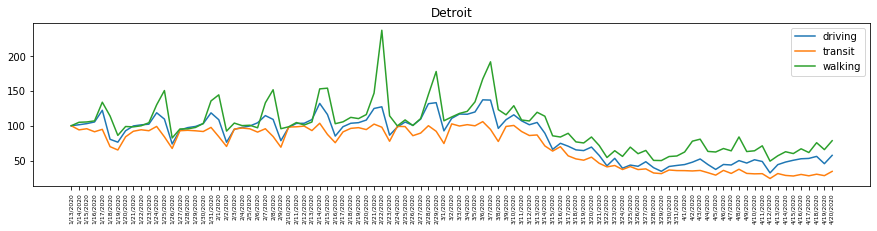

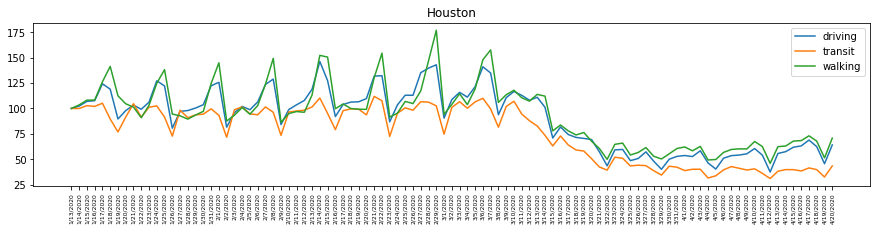

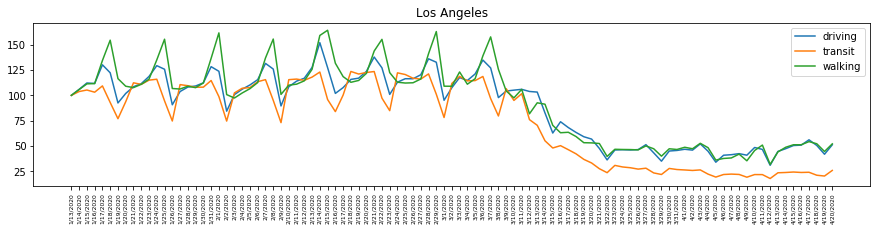

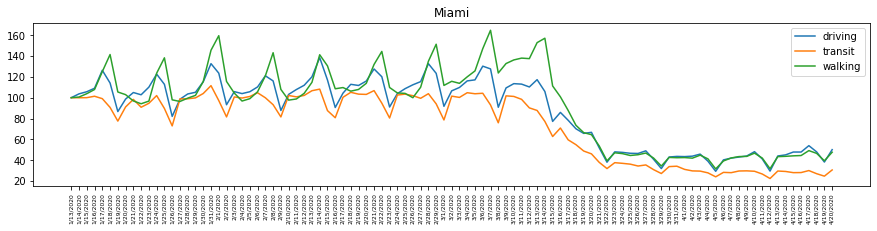

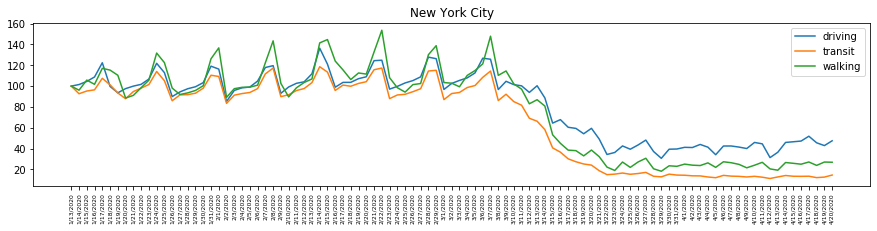

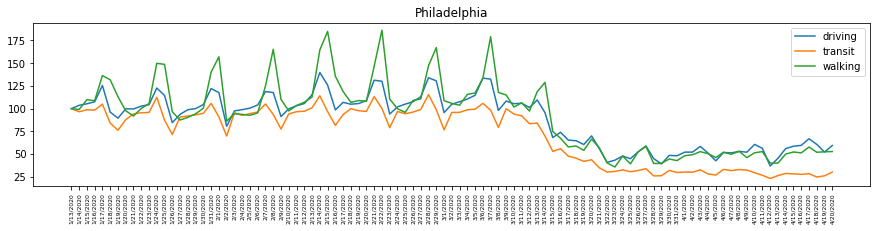

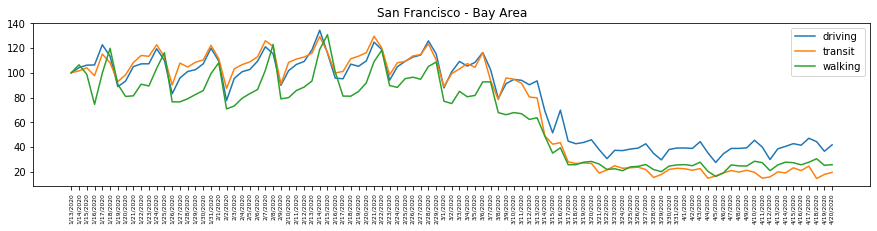

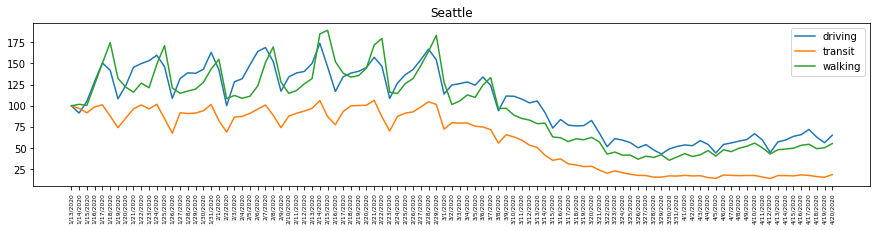

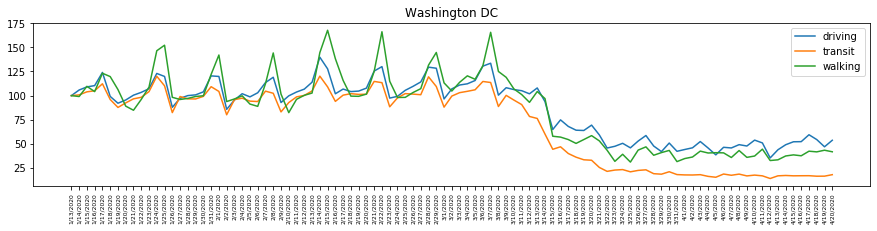

In [50]:
# Apple Mobility Data Only
for i in range(0,len(apple),3):
    current = apple.iloc[i:i+3,:]
    plt.figure(figsize=(15,3))
    plt.plot(current.iloc[0,4:].index,current.iloc[0,4:], label=current.iloc[0]["transportation_type"])
    plt.plot(current.iloc[1,4:].index,current.iloc[1,4:], label=current.iloc[1]["transportation_type"])
    plt.plot(current.iloc[2,4:].index,current.iloc[2,4:], label=current.iloc[2]["transportation_type"])
    plt.xticks(rotation=90, fontsize=6)
    plt.legend()
    plt.title(current.iloc[0]["region"])
    plt.show()

In [35]:
mitig.head()

,Unnamed: 0,State,County,Date,Raw Description,Information type,Mitigation type,Note,UserID,Source
0,0,USA,NaN,1/17/2020,Public Health Screening to Begin at 3 U.S. Air...,government,movement restriction,NaN,am50,https://www.cdc.gov/media/releases/2020/p0117-...
1,1,USA,NaN,1/31/2020,"January 31, 2020—HHS Secretary Azar Declares P...",government,other,NaN,"az17, BR30",https://www.nga.org/coronavirus/
2,2,USA,NaN,1/31/2020,The White House announced that it would ban en...,government,movement restriction,restriction on entry to USA,BR30,https://www.nbcnews.com/health/health-news/cor...
3,3,USA,NaN,2/2/2020,"February 2, 2020—Department of Homeland Securi...",government,movement restriction,NaN,"az17, BR30",https://www.nga.org/coronavirus/
4,4,USA,NaN,2/2/2020,"February 2, 2020—State Department issued a tra...",government,movement restriction,NaN,"az17, BR30",https://www.nga.org/coronavirus/


In [12]:
"""
Args-
mobility = array-like object of time series with date indices
mob_labels = array-like object of labels for the legend of the different time series
mitig_dates = array-like object of datetimes when mitigation events occurred
mitig_types = array-like object of strings 
state = string name of state
region = string name of city
"""
def plot_mitig_mob(mobility, mob_labels, mitig_dates, mitig_types, state, 
                   region=None, text_height=0, height_mod=40, figsize=(15,5), rotation=90, fontsize=7):
    if len(mobility) != len(mob_labels):
        raise ValueError("mobility and mob_labels must be the same length")
    if len(mitig_dates) != len(mitig_types):
        raise ValueError("mitig_dates and mitig_types must be the same length")
    y = []
    prev = None
    count = 0
    i = 0
    for date in mitig_dates:
        if date == prev:
            count += 1
        else:
            count = 0
        y.append(text_height + (count * height_mod))
        prev = date
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    for i in range(len(mobility)):
        ax.plot(mobility[i].index, mobility[i].values, label=mob_labels[i])
    for i in range(len(y)):
        ax.text(mitig_dates[i], y[i], mitig_types[i],rotation=rotation, fontsize=fontsize)
    plt.yticks([x for x in range(-60,201,20)])
    plt.xticks(rotation=90, fontsize=8)
    plt.grid(b=True, which='both', axis='x')
    plt.legend()
    if region:
        plt.title(region)
    else:
        plt.title(state)
    plt.show()


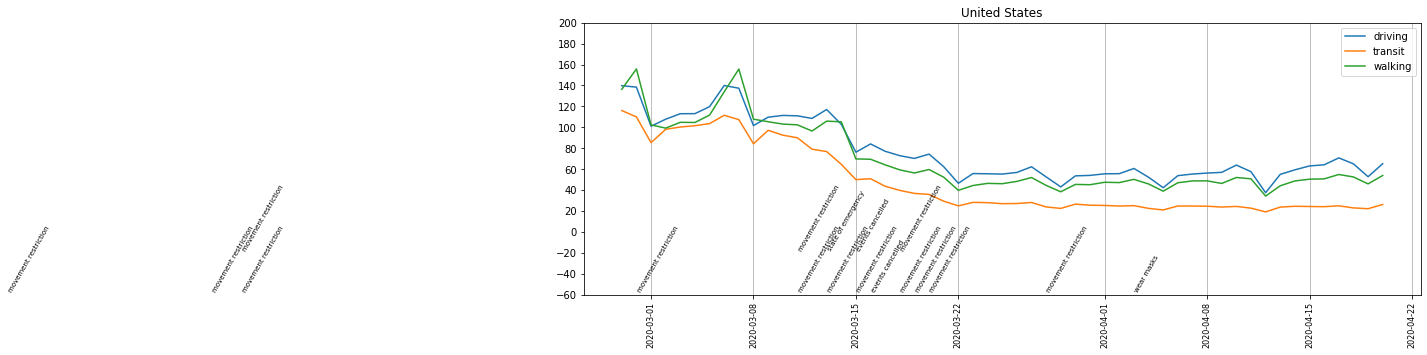

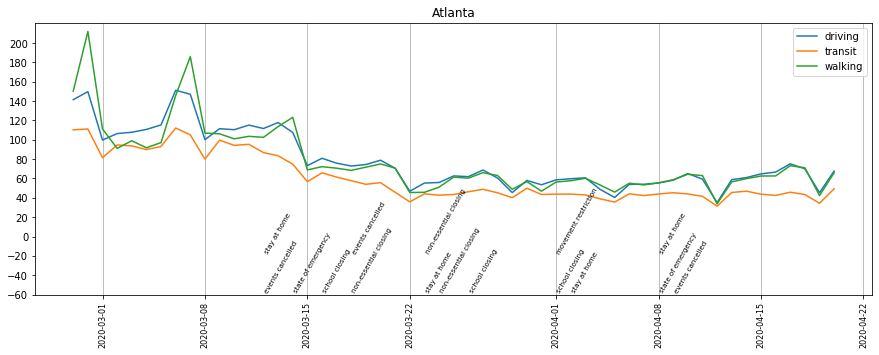

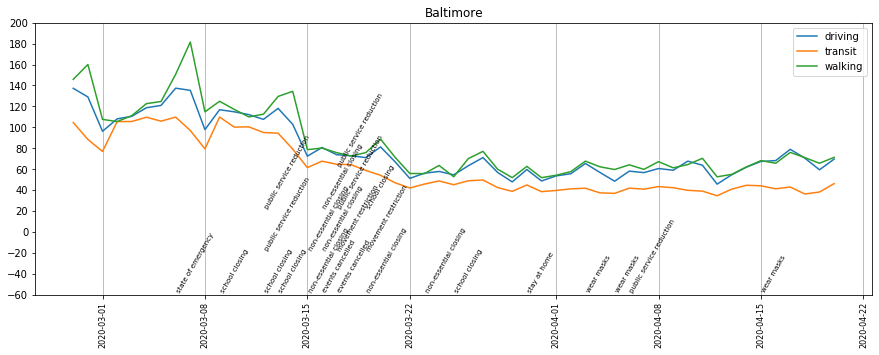

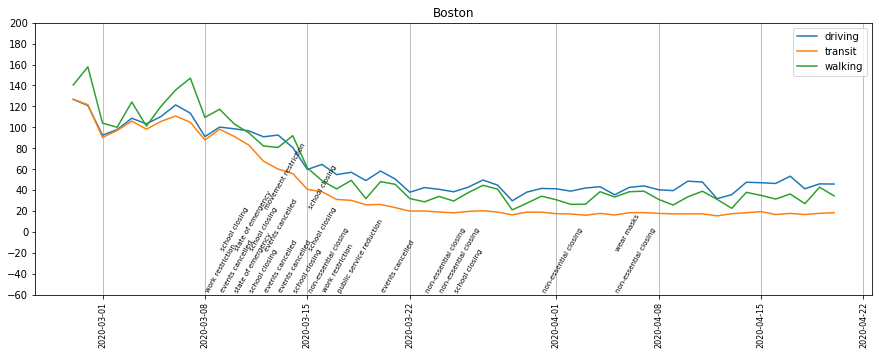

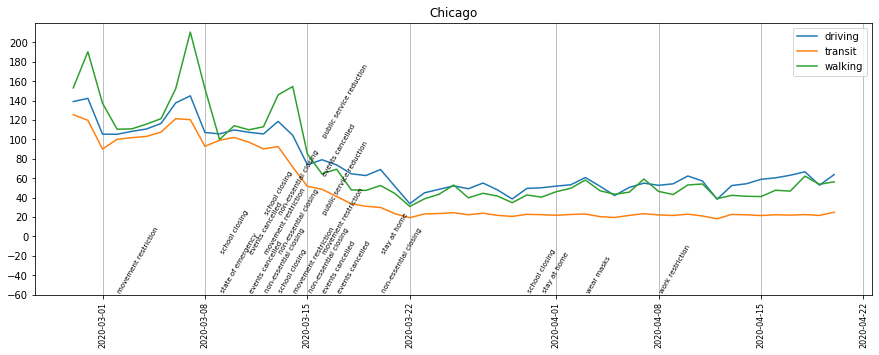

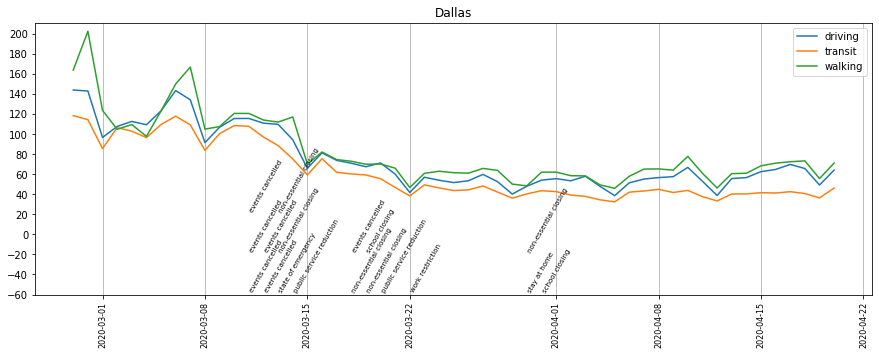

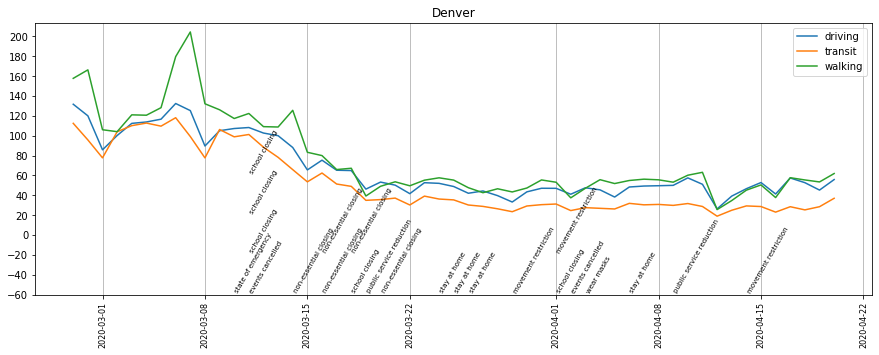

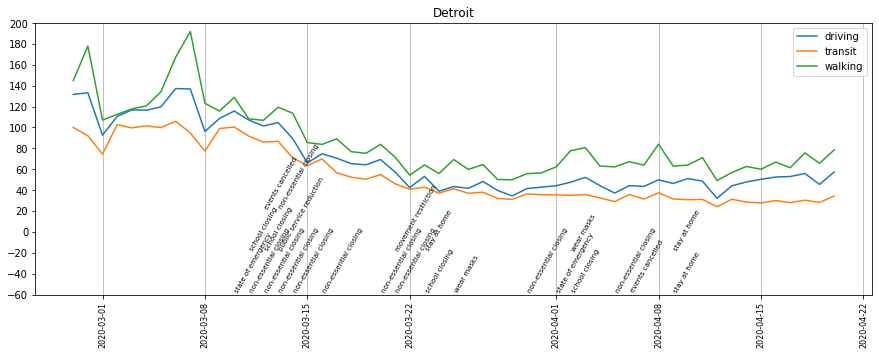

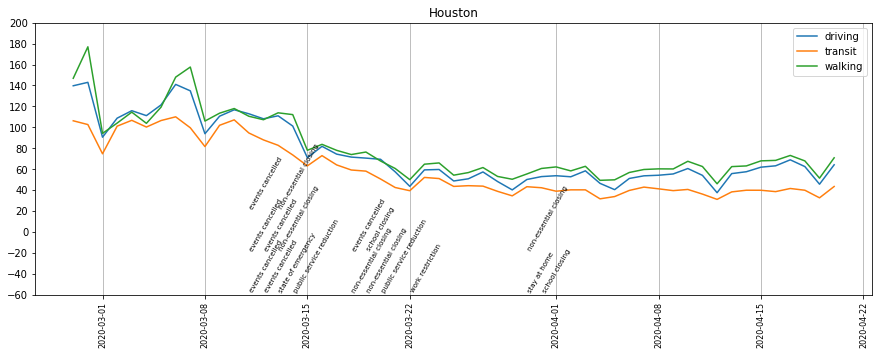

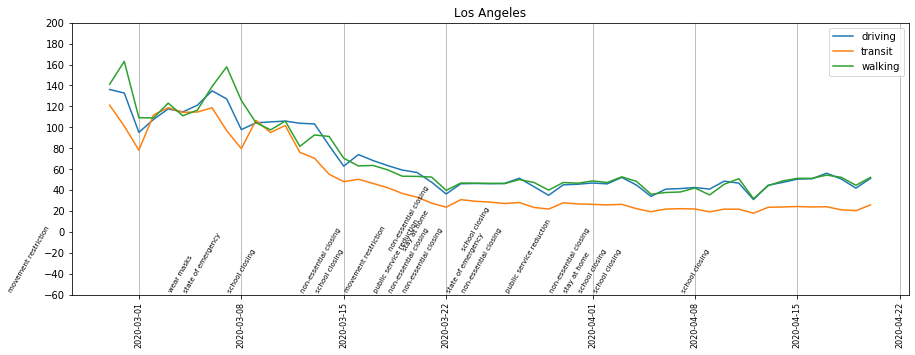

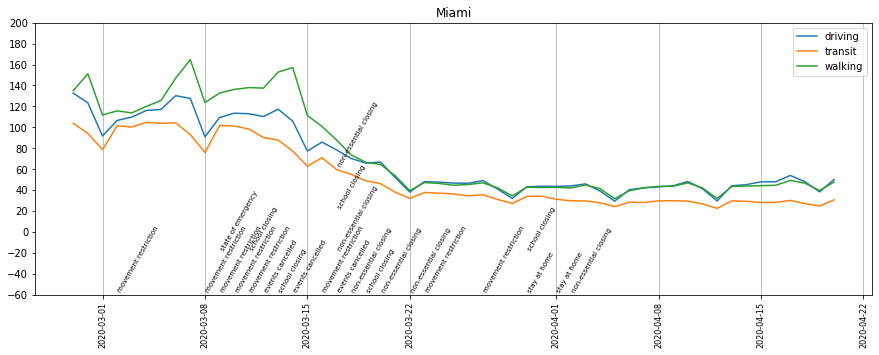

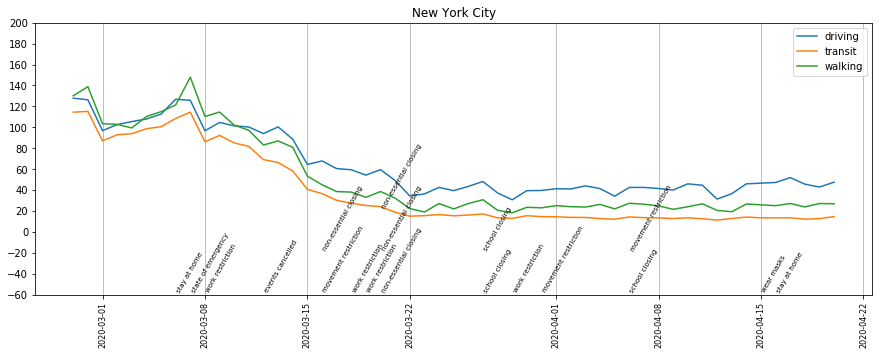

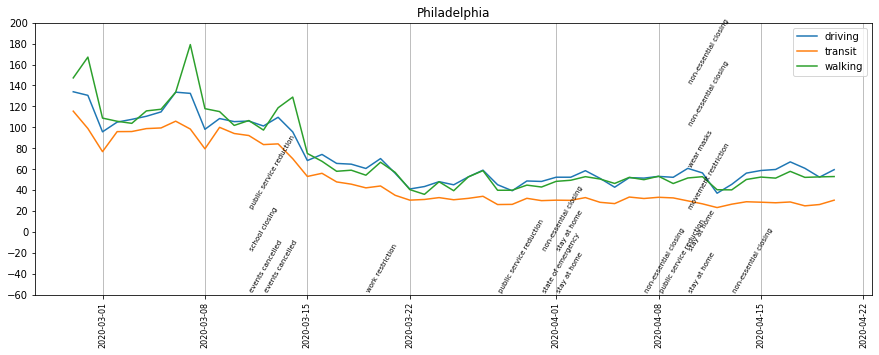

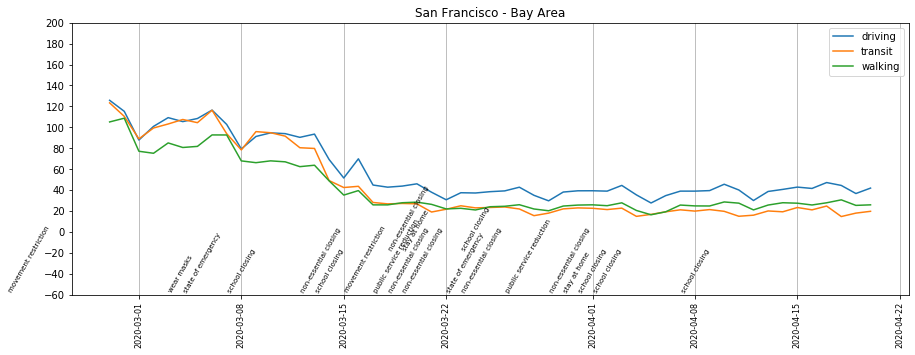

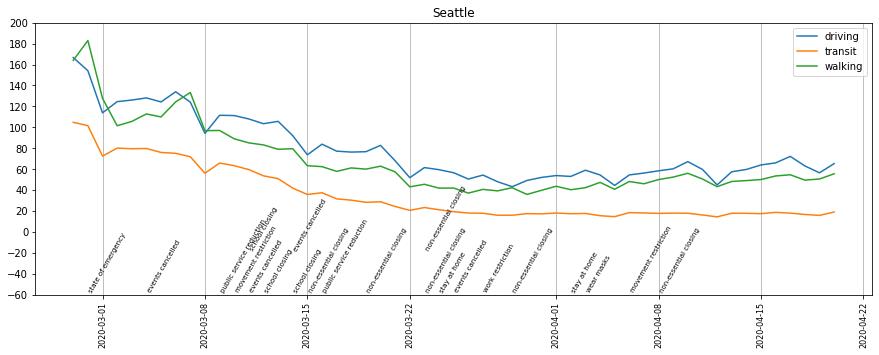

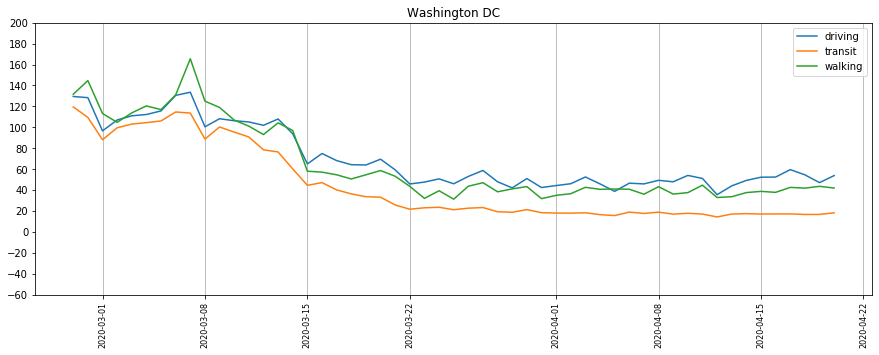

In [13]:

for i in range(0,len(apple),3):
    current = apple.iloc[i:i+3,:]
    state = current.iloc[0]["state"]
    region = current.iloc[0]["region"]
    dates = pd.to_datetime(current.columns[50:])
    mobility = []
    mob_labels = []
    for j in range(3):
        mob_labels.append(current.iloc[j]["transportation_type"])
        mobility.append(Series(index=dates, data=current.iloc[j,50:]))
    state_data = mitig[(mitig["State"]) == state]
    refined = state_data[state_data["Mitigation type"] != "other"] # don't include other tag
    refined = refined[refined["Mitigation type"] != "new public services"]
    refined = refined[refined["County"].isna()] # only look at state wide
    mitig_types = refined["Mitigation type"].values
    mitig_dates = pd.to_datetime(refined["Date"].values)
    plot_mitig_mob(mobility, mob_labels, mitig_dates, mitig_types, state, region=region,rotation=60, text_height=-58)

     Unnamed: 0    State                      County       Date  \
618         618  Florida  Tampa, Jacksonville, Miami  2/29/2020   
619         619  Florida                         NaN   3/1/2020   
620         620  Florida                         NaN   3/2/2020   
621         621  Florida                         NaN   3/2/2020   
622         622  Florida                         NaN   3/3/2020   
..          ...      ...                         ...        ...   
699         699  Florida                     Osceola  4/10/2020   
700         700  Florida                  Palm Beach  4/11/2020   
701         701  Florida                  Miami-Dade  4/11/2020   
702         702  Florida                         NaN  4/11/2020   
703         703  Florida                         NaN  4/14/2020   

                                       Raw Description Information type  \
618  State labs in Tampa, Jacksonville and Miami ga...            other   
619  Gov. Ron DeSantis declares a public heal

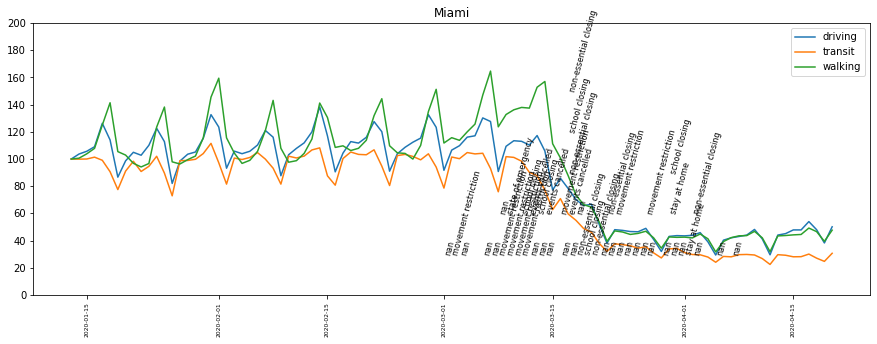

In [33]:
# current = apple[apple["state"] == "Florida"]
# state = current.iloc[0]["state"]
# region = current.iloc[0]["region"]
# dates = pd.to_datetime(current.columns[4:])
# mobility = []
# mob_labels = []
# for j in range(3):
#     mob_labels.append(current.iloc[j]["transportation_type"])
#     mobility.append(Series(index=dates, data=current.iloc[j,4:]))
# state_data = mitig[(mitig["State"]) == state]
# print(state_data)
# refined = state_data[state_data["Mitigation type"] != "other"] # don't include other tag
# refined = refined[refined["Mitigation type"] != "new public services"]
# refined = refined[refined["County"].isna()] # only look at state wide
# mitig_types = refined["Mitigation type"].values
# print(mitig_types)
# mitig_dates = pd.to_datetime(refined["Date"].values)
# plot_mitig_mob(mobility, mob_labels, mitig_dates, mitig_types, state, region=region,rotation=75, text_height=30)